In [6]:
import geopandas as gpd
import pandas as pd

folder = '../data/boston/training-sets/processing/'

In [10]:
cells_with_stations = gpd.read_file(folder + 'cells_with_stations.geojson')
print(len(cells_with_stations))
cells_with_stations.head()

221


i   j  index_right                                              sname  \
0  1   7          279                       Williams St at Washington St   
1  1  10          232                   Four Corners - 157 Washington St   
2  1  10          170  Franklin Park Zoo - Franklin Park Rd at Blue H...   
3  2   6          124                Curtis Hall - South St at Centre St   
4  2   7          133         Green Street T Stop - Green St at Amory St   

         lat        lon                                           geometry  
0  42.306539 -71.107669  POLYGON ((-71.10317379999999 42.3012051, -71.1...  
1  42.304128 -71.079295  POLYGON ((-71.07890485 42.3012051, -71.0789048...  
2  42.303469 -71.085347  POLYGON ((-71.07890485 42.3012051, -71.0789048...  
3  42.309054 -71.115430  POLYGON ((-71.11126345 42.3072102, -71.1112634...  
4  42.310579 -71.107341  POLYGON ((-71.10317379999999 42.3072102, -71.1...

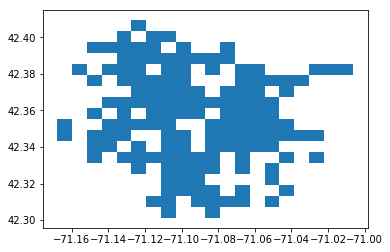

In [16]:
cells_with_stations.plot()

In [17]:
cells = cells_with_stations_stations[['i', 'j']].drop_duplicates()
len(cells)

146

In [12]:
elevations_orig = pd.read_csv(folder + 'origins_elev.csv')
print(len(elevations_orig))
elevations_orig.head()

163


i_start  j_start  elevation
0        0       11  37.940201
1        0       13   6.158590
2        1        7   9.146144
3        1       10  35.908482
4        2        6  20.045176

In [15]:
values = elevations_orig.groupby(['i_start', 'j_start']).count()['elevation']
values.value_counts()

1    163
Name: elevation, dtype: int64

In [19]:
merge_orig = elevations_orig.merge(cells, left_on=['i_start', 'j_start'], right_on=['i', 'j'])
len(merge_orig)

144

In [20]:
elevations_dest = pd.read_csv(folder + 'destinations_elev.csv')
print(len(elevations_dest))
elevations_dest.head()

163


i_end  j_end  elevation
0      0     11  27.484873
1      0     13   3.004028
2      1      7   5.591386
3      1     10  20.771862
4      2      6  11.810518

In [21]:
merge_dest = elevations_dest.merge(cells, left_on=['i_end', 'j_end'], right_on=['i', 'j'])
len(merge_orig)

144